In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium # Assuming latitude and longitude data are available

In [5]:
# Load the datasets
shootings = pd.read_csv(r'C:\Users\bose\Downloads\made-template\data\shootings.csv')
weather = pd.read_csv(r'C:\Users\bose\Downloads\made-template\data\Weather_2015_2020.csv')

In [6]:
print(shootings)
print(weather)

        id                name        date   manner_of_death       armed  \
0        3          Tim Elliot  2015-01-02              shot         gun   
1        4    Lewis Lee Lembke  2015-01-02              shot         gun   
2        5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed   
3        8     Matthew Hoffman  2015-01-04              shot  toy weapon   
4        9   Michael Rodriguez  2015-01-04              shot    nail gun   
...    ...                 ...         ...               ...         ...   
4890  5916     Rayshard Brooks  2020-06-12              shot       Taser   
4891  5925      Caine Van Pelt  2020-06-12              shot         gun   
4892  5918        Hannah Fizer  2020-06-13              shot     unarmed   
4893  5921      William Slyter  2020-06-13              shot         gun   
4894  5924      Nicholas Hirsh  2020-06-15              shot         gun   

       age gender      race           city state  signs_of_mental_illness  \
0     53.0

In [7]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46230817 entries, 0 to 46230816
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ID         object 
 1   DATE       object 
 2   TMAX       float64
 3   TMIN       float64
 4   EVAP       float64
 5   PRCP       float64
 6   Latitude   float64
 7   Longitude  float64
 8   Elevation  float64
dtypes: float64(7), object(2)
memory usage: 3.1+ GB


In [9]:
shootings.nunique()
weather.nunique()

ID           40474
DATE          2192
TMAX          1049
TMIN          1041
EVAP          1226
PRCP          2116
Latitude     35582
Longitude    38151
Elevation     6760
dtype: int64

In [10]:
shootings.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,4895.0,2902.15,1683.47,3.0,1441.5,2847.0,4352.5,5925.0
age,4895.0,36.55,12.69,6.0,27.0,35.0,45.0,91.0


In [11]:
weather.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
TMAX,46230817.0,183.57,72.00,-999.00,189.00,189.00,189.00,1833.00
TMIN,46230817.0,54.17,65.17,-999.00,56.00,56.00,56.00,1356.00
EVAP,296113.0,88.25,700.20,-2537.00,28.00,53.00,81.00,93980.00
PRCP,42682139.0,30.50,92.82,0.00,0.00,0.00,10.00,9268.00
Latitude,46230817.0,38.76,6.11,19.01,34.73,39.06,42.37,71.32
Longitude,46230817.0,-97.35,16.58,-176.65,-107.29,-95.96,-84.42,-66.99
Elevation,46230817.0,590.50,692.87,-999.90,141.40,288.60,788.20,3694.20


In [12]:
# Check for missing values
print(shootings.isnull().sum())

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64


In [13]:
print(weather.isnull().sum())

ID                  0
DATE                0
TMAX                0
TMIN                0
EVAP         45934704
PRCP          3548678
Latitude            0
Longitude           0
Elevation           0
dtype: int64


In [14]:
# Convert date columns to datetime format
shootings['date'] = pd.to_datetime(shootings['date'])
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [15]:
# Sort the data by 'DATE'
sorted_weather = weather.sort_values('DATE')

# Optionally, you can reset the index if you want a clean index after sorting
sorted_weather.reset_index(drop=True, inplace=True)

In [16]:
# Display the first few rows of the sorted data to verify
print(sorted_weather.head())

            ID       DATE   TMAX   TMIN  EVAP  PRCP  Latitude  Longitude  \
0  USC00248569 2015-01-01   -6.0  -61.0   NaN   0.0   47.8800  -105.3686   
1  US1CAIN0006 2015-01-01  189.0   56.0   NaN   0.0   37.3992  -118.3465   
2  USC00267612 2015-01-01  -22.0 -222.0   NaN   0.0   38.8822  -119.3511   
3  US1COEP0231 2015-01-01  189.0   56.0   NaN   0.0   38.8656  -104.7852   
4  US1MOFSA175 2015-01-01  189.0   56.0   NaN   0.0   39.4559   -92.4357   

   Elevation  
0      696.2  
1     1254.6  
2     1524.0  
3     1917.8  
4      266.1  


In [17]:
# Display the last few rows to ensure the data covers up to the end of 2020
print(sorted_weather.tail())

                   ID       DATE   TMAX   TMIN  EVAP  PRCP  Latitude  \
46230812  US10ceda002 2020-12-31  189.0   56.0   NaN   0.0   42.7652   
46230813  USW00004808 2020-12-31  -38.0 -105.0   NaN   0.0   41.7714   
46230814  US1MDSM0003 2020-12-31  189.0   56.0   NaN   0.0   38.3055   
46230815  US1MNMR0021 2020-12-31  189.0   56.0   NaN   0.0   46.3050   
46230816  US1NCHN0019 2020-12-31  189.0   56.0   NaN   0.0   35.4412   

          Longitude  Elevation  
46230812   -97.3027      401.1  
46230813   -88.4814      213.7  
46230814   -76.6337       32.9  
46230815   -94.5071      372.8  
46230816   -82.4596      670.9  


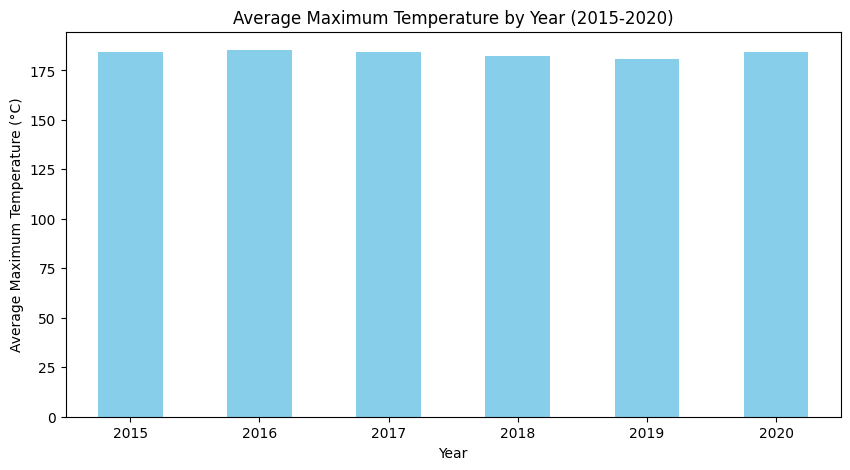

In [18]:
# Group by year and calculate average maximum temperature
yearly_avg_temp = sorted_weather.groupby(sorted_weather['DATE'].dt.year)['TMAX'].mean()

plt.figure(figsize=(10, 5))
yearly_avg_temp.plot(kind='bar', color='skyblue')
plt.title('Average Maximum Temperature by Year (2015-2020)')
plt.xlabel('Year')
plt.ylabel('Average Maximum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

In [19]:
# Using median to impute TMAX and TMIN to minimize the impact of outliers
weather['TMAX'] = weather['TMAX'].fillna(weather['TMAX'].median())
weather['TMIN'] = weather['TMIN'].fillna(weather['TMIN'].median())

# Assuming PRCP missing values can be treated as 0 (no precipitation)
weather['PRCP'] = weather['PRCP'].fillna(0)

# Evaporation data might not be critical for your analysis unless specified
weather['EVAP'] = weather['EVAP'].fillna(weather['EVAP'].median())

In [20]:
print(weather.isnull().sum())

ID           0
DATE         0
TMAX         0
TMIN         0
EVAP         0
PRCP         0
Latitude     0
Longitude    0
Elevation    0
dtype: int64


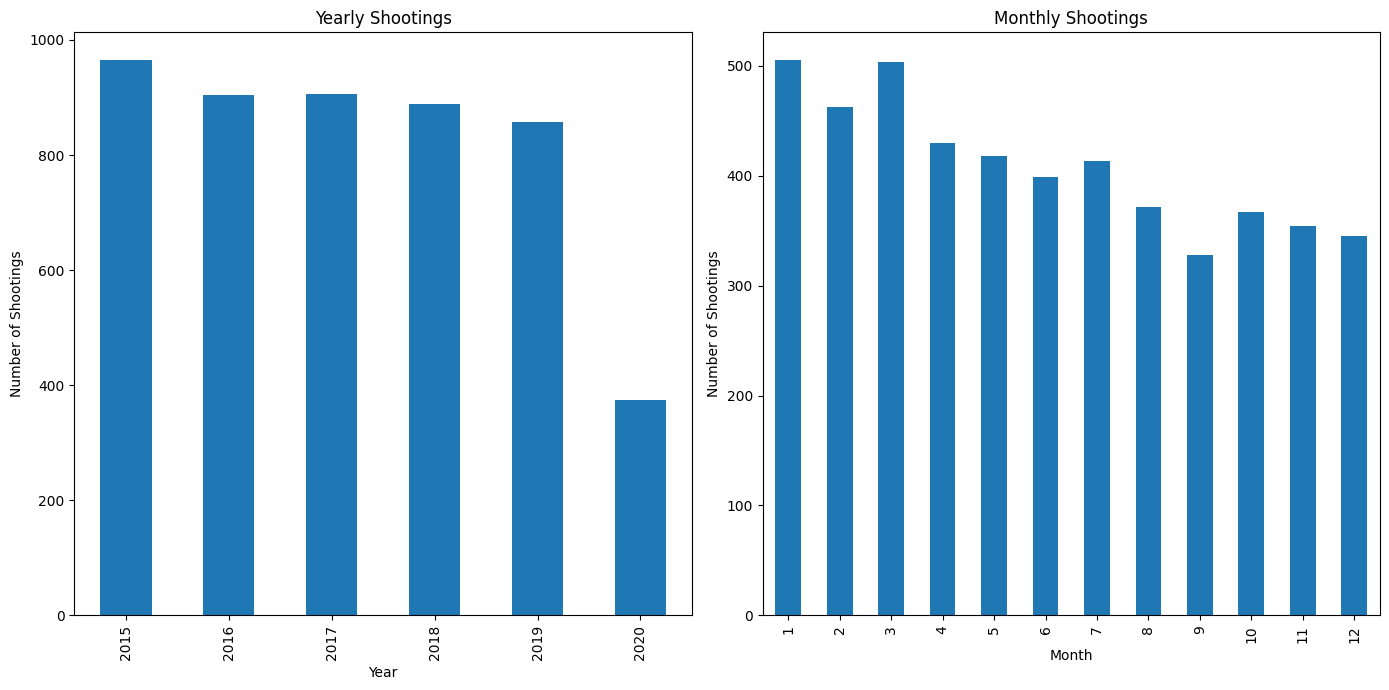

In [21]:
# Extract year and month for temporal analysis
shootings['year'] = shootings['date'].dt.year
shootings['month'] = shootings['date'].dt.month

# Count shootings by year and month
yearly_counts = shootings.groupby('year').size()
monthly_counts = shootings.groupby('month').size()

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
yearly_counts.plot(kind='bar')
plt.title('Yearly Shootings')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')

plt.subplot(1, 2, 2)
monthly_counts.plot(kind='bar')
plt.title('Monthly Shootings')
plt.xlabel('Month')
plt.ylabel('Number of Shootings')
plt.tight_layout()
plt.show()

In [22]:
# Print the first few entries in the 'date' column
print(shootings['date'].head())

0   2015-01-02
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-04
Name: date, dtype: datetime64[ns]


C:\Users\bose\AppData\Local\Temp\ipykernel_11752\1103309809.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')


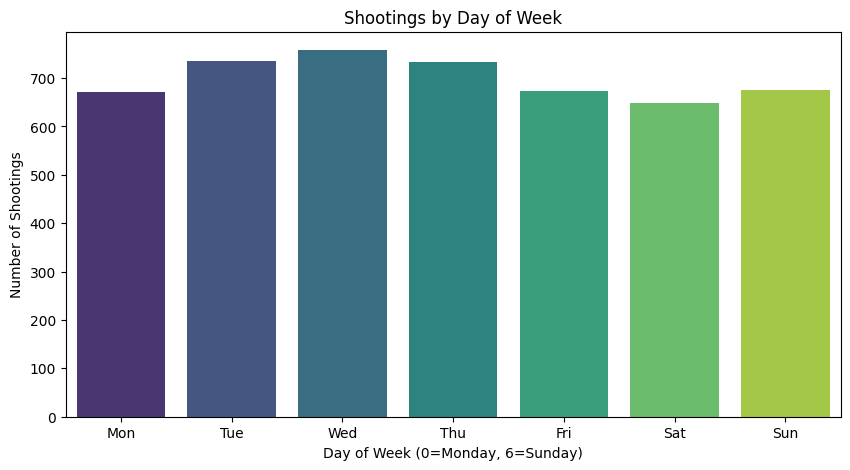

In [23]:
# Count shootings by day of the week
# Extract the day of the week; Pandas uses Monday=0, Sunday=6
shootings['day_of_week'] = shootings['date'].dt.dayofweek
day_counts = shootings['day_of_week'].value_counts().sort_index()

# Plot the shootings by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Shootings by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Shootings')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

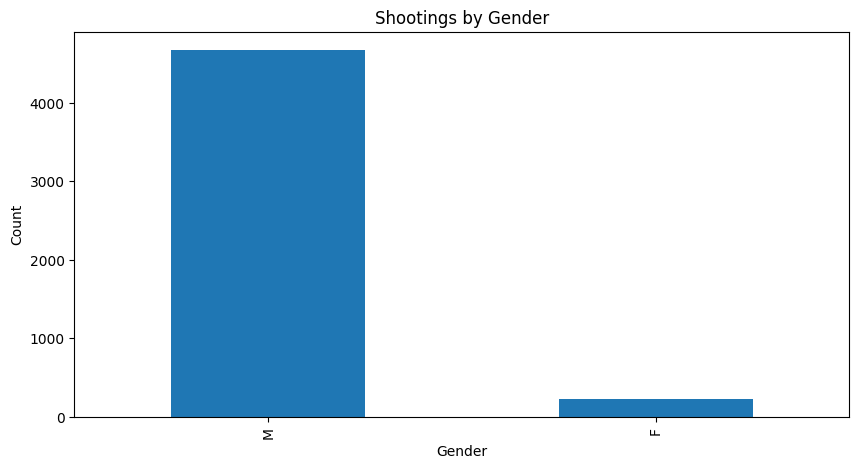

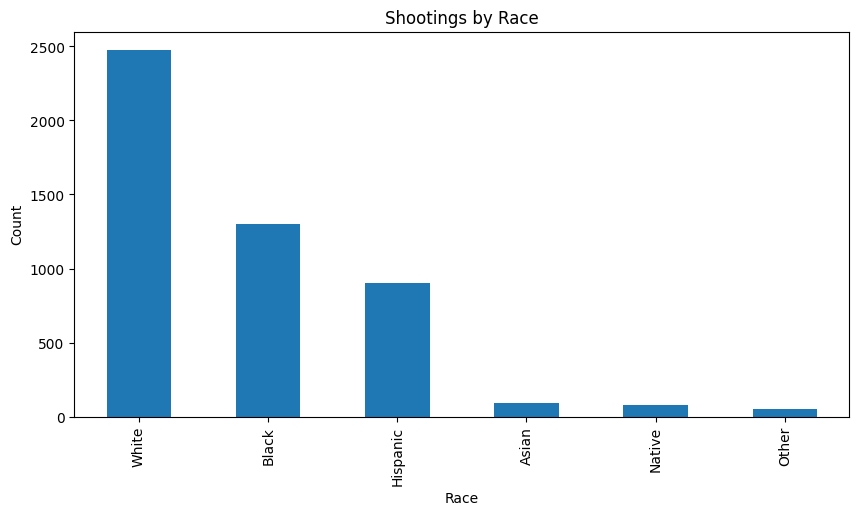

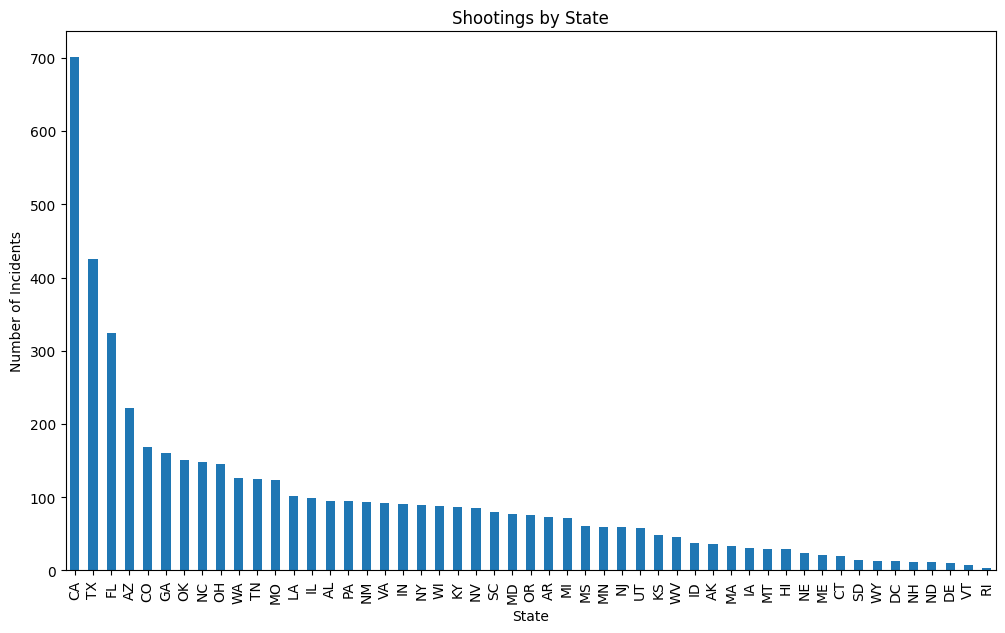

In [24]:
# Explore the distribution of shootings by gender and race
plt.figure(figsize=(10, 5))
shootings['gender'].value_counts().plot(kind='bar')
plt.title('Shootings by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
shootings['race'].value_counts().plot(kind='bar')
plt.title('Shootings by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Analyze shootings by state
plt.figure(figsize=(12, 7))
shootings['state'].value_counts().plot(kind='bar')
plt.title('Shootings by State')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.show()

C:\Users\bose\AppData\Local\Temp\ipykernel_11752\565076063.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\bose\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


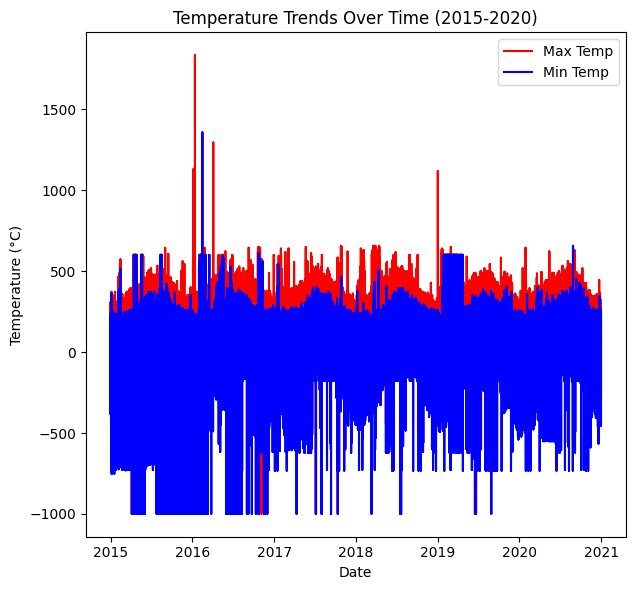

In [25]:
plt.figure(figsize=(12, 6))

# Subplot for temperature trends
plt.subplot(1, 2, 1)
plt.plot(sorted_weather['DATE'], sorted_weather['TMAX'], label='Max Temp', color='red')
plt.plot(sorted_weather['DATE'], sorted_weather['TMIN'], label='Min Temp', color='blue')
plt.title('Temperature Trends Over Time (2015-2020)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\bose\AppData\Local\Temp\ipykernel_11752\3596133814.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


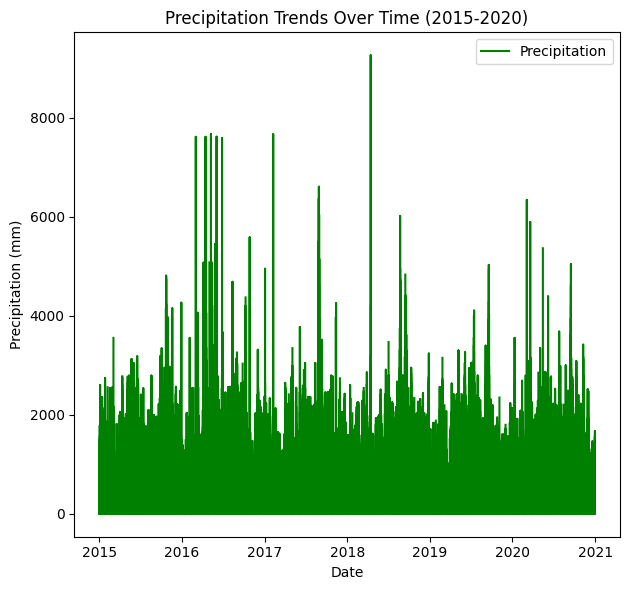

In [26]:
import matplotlib as mpl

# Set chunk size and enable path simplification
mpl.rcParams['agg.path.chunksize'] = 10000
mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 0.1

plt.figure(figsize=(12, 6))

# Subplot for precipitation trends
plt.subplot(1, 2, 1)
plt.plot(sorted_weather['DATE'], sorted_weather['PRCP'], label='Precipitation', color='green')
plt.title('Precipitation Trends Over Time (2015-2020)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Adding year and month columns
sorted_weather['year'] = sorted_weather['DATE'].dt.year
sorted_weather['month'] = sorted_weather['DATE'].dt.month

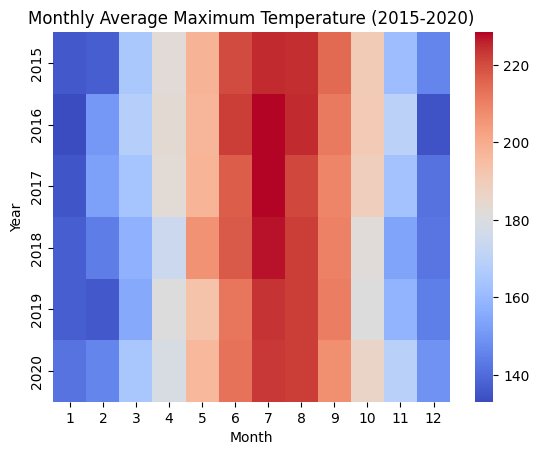

In [28]:
# Calculate average monthly maximum temperature
monthly_temp = sorted_weather.groupby(['year', 'month'])['TMAX'].mean().unstack()
sns.heatmap(monthly_temp, cmap='coolwarm', annot=False)  # 'annot=True' to show the values
plt.title('Monthly Average Maximum Temperature (2015-2020)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

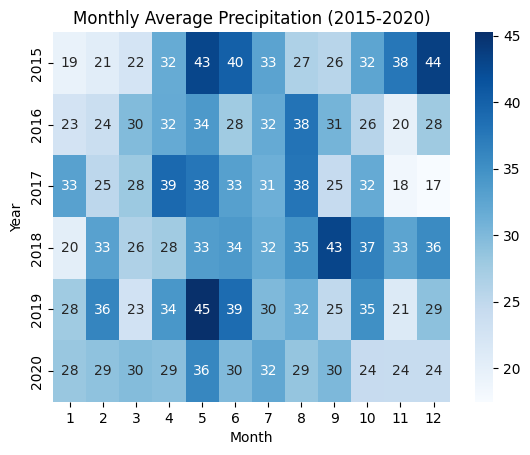

In [29]:
# Calculate average monthly precipitation
monthly_prec = sorted_weather.groupby(['year', 'month'])['PRCP'].mean().unstack()
sns.heatmap(monthly_prec, cmap='Blues', annot=True)  # 'annot=True' to show the values
plt.title('Monthly Average Precipitation (2015-2020)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [30]:
# Counting shootings by city and state
city_counts = shootings.groupby(['city', 'state']).size().reset_index(name='counts')

# Sorting to find top cities with the most shootings
top_cities = city_counts.sort_values(by='counts', ascending=False).head(20)

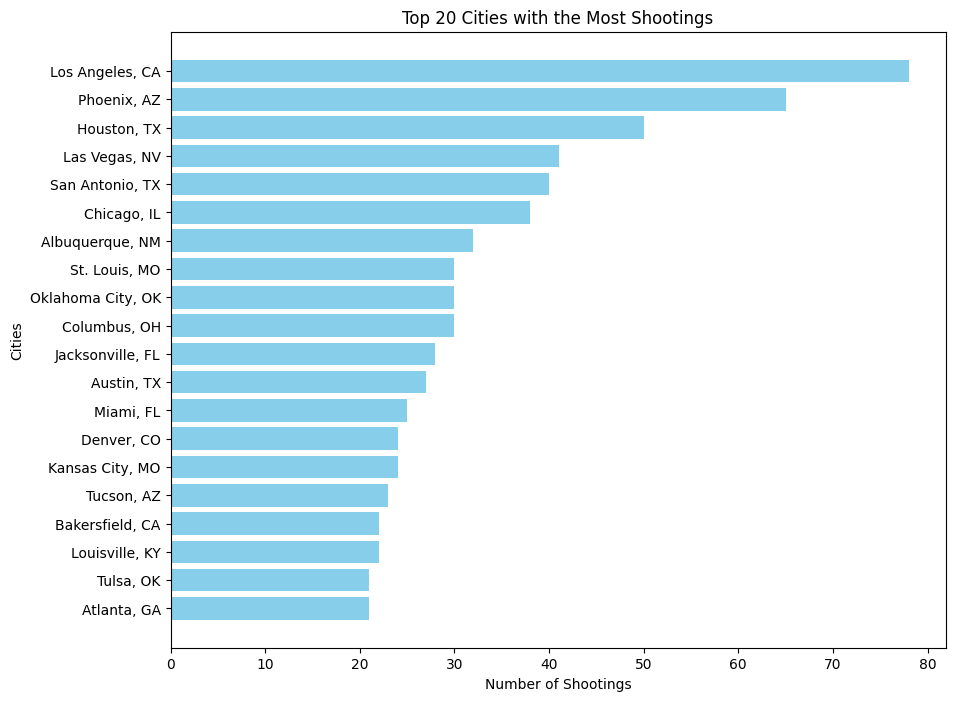

In [31]:
# Plotting the top cities
plt.figure(figsize=(10, 8))
plt.barh(top_cities['city'] + ', ' + top_cities['state'], top_cities['counts'], color='skyblue')
plt.xlabel('Number of Shootings')
plt.ylabel('Cities')
plt.title('Top 20 Cities with the Most Shootings')
plt.gca().invert_yaxis()  # To display the city with the highest incidents at the top
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [33]:
# Prepare data
shootings['month'] = pd.to_datetime(shootings['date']).dt.month
shootings['day_of_week'] = pd.to_datetime(shootings['date']).dt.dayofweek
X = shootings[['month', 'day_of_week']]  # Example features
y = (shootings['age'] > 1).astype(int)  # Example target variable

In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Predictions and evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       979

    accuracy                           1.00       979
   macro avg       1.00      1.00      1.00       979
weighted avg       1.00      1.00      1.00       979



In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
print(shootings.index)

RangeIndex(start=0, stop=4895, step=1)


In [39]:
shootings.reset_index(inplace=True)

In [40]:
print(shootings.head())

   index  id                name       date   manner_of_death       armed  \
0      0   3          Tim Elliot 2015-01-02              shot         gun   
1      1   4    Lewis Lee Lembke 2015-01-02              shot         gun   
2      2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed   
3      3   8     Matthew Hoffman 2015-01-04              shot  toy weapon   
4      4   9   Michael Rodriguez 2015-01-04              shot    nail gun   

    age gender      race           city state  signs_of_mental_illness  \
0  53.0      M     Asian        Shelton    WA                     True   
1  47.0      M     White          Aloha    OR                    False   
2  23.0      M  Hispanic        Wichita    KS                    False   
3  32.0      M     White  San Francisco    CA                     True   
4  39.0      M  Hispanic          Evans    CO                    False   

  threat_level         flee  body_camera          arms_category  year  month  \
0       atta

In [41]:
print(shootings.columns)

Index(['index', 'id', 'name', 'date', 'manner_of_death', 'armed', 'age',
       'gender', 'race', 'city', 'state', 'signs_of_mental_illness',
       'threat_level', 'flee', 'body_camera', 'arms_category', 'year', 'month',
       'day_of_week'],
      dtype='object')


C:\Users\bose\AppData\Local\Temp\ipykernel_11752\2897990860.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_shootings = shootings.resample('M').sum()


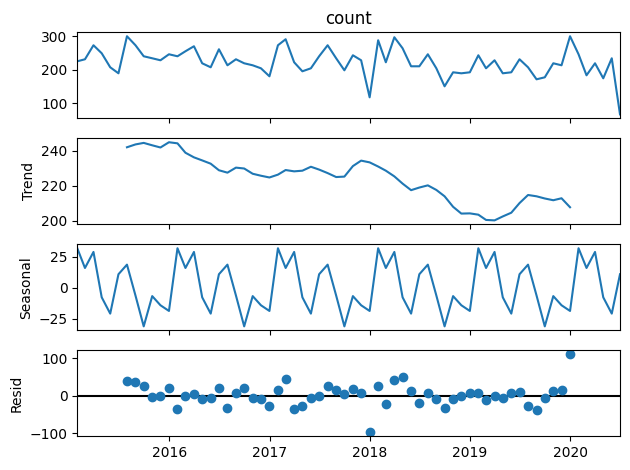

In [42]:
# Time series analysis
shootings['count'] = 3
shootings.set_index('date', inplace=True)
monthly_shootings = shootings.resample('M').sum()

# Decompose the time series
result = seasonal_decompose(monthly_shootings['count'], model='additive')
result.plot()
plt.show()

In [43]:
print(shootings.index)

DatetimeIndex(['2015-01-02', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-04', '2015-01-04', '2015-01-05', '2015-01-06',
               '2015-01-06', '2015-01-06',
               ...
               '2020-06-07', '2020-06-09', '2020-06-11', '2020-06-11',
               '2020-06-11', '2020-06-12', '2020-06-12', '2020-06-13',
               '2020-06-13', '2020-06-15'],
              dtype='datetime64[ns]', name='date', length=4895, freq=None)


In [44]:
shootings.reset_index(inplace=True)

In [45]:
print(shootings.columns)

Index(['date', 'index', 'id', 'name', 'manner_of_death', 'armed', 'age',
       'gender', 'race', 'city', 'state', 'signs_of_mental_illness',
       'threat_level', 'flee', 'body_camera', 'arms_category', 'year', 'month',
       'day_of_week', 'count'],
      dtype='object')


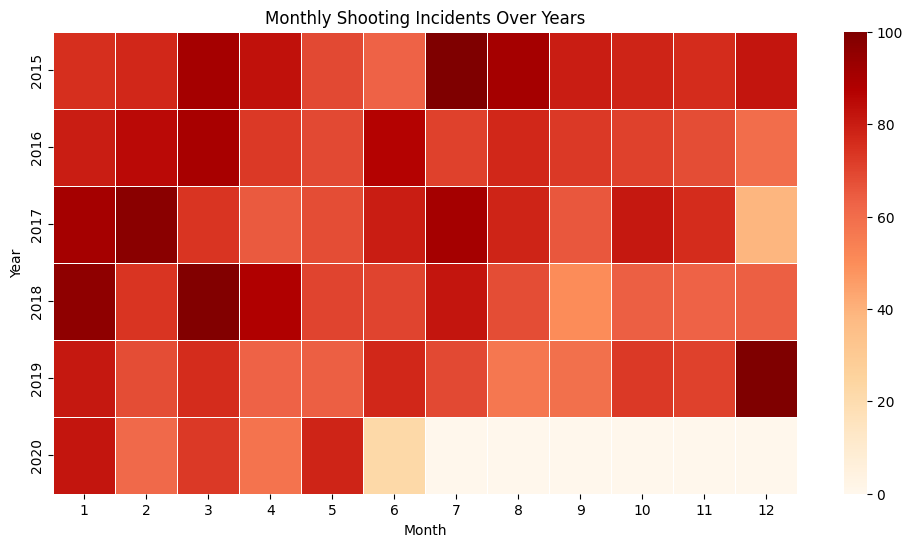

In [46]:
sorted_weather = sorted_weather.drop_duplicates(subset=['DATE'])

# Use merge_asof for efficient time series alignment
sorted_weather = sorted_weather.sort_values('DATE')
shootings = shootings.sort_values('date')
combined_data = pd.merge_asof(
    shootings, sorted_weather, left_on='date', right_on='DATE', direction='nearest'
)

# Analyze shootings by year and month to identify patterns
shootings['year'] = shootings['date'].dt.year
shootings['month'] = shootings['date'].dt.month

monthly_counts = shootings.groupby(['year', 'month']).size().unstack(fill_value=0)

# Plotting monthly shooting incidents over years
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_counts, cmap='OrRd', linewidths=.5)
plt.title('Monthly Shooting Incidents Over Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [47]:
# Aggregate daily shooting counts
daily_shootings = combined_data.groupby('date').size().reset_index(name='shooting_count')

# Merge with weather data
daily_data = pd.merge(daily_shootings, sorted_weather, left_on='date', right_on='DATE', how='left')

# Check correlation between shootings and weather conditions
correlation_matrix = daily_data[['shooting_count', 'TMAX', 'TMIN', 'PRCP']].corr()
print(correlation_matrix)

                shooting_count      TMAX      TMIN      PRCP
shooting_count        1.000000 -0.044102 -0.040731 -0.037988
TMAX                 -0.044102  1.000000  0.889624  0.018920
TMIN                 -0.040731  0.889624  1.000000  0.051952
PRCP                 -0.037988  0.018920  0.051952  1.000000


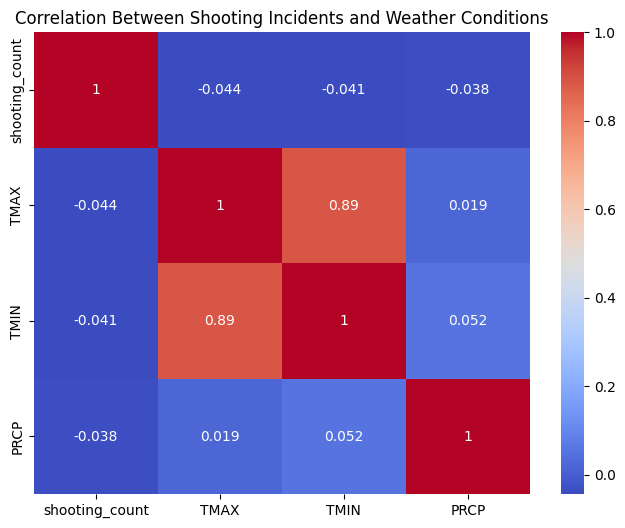

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Shooting Incidents and Weather Conditions')
plt.show()

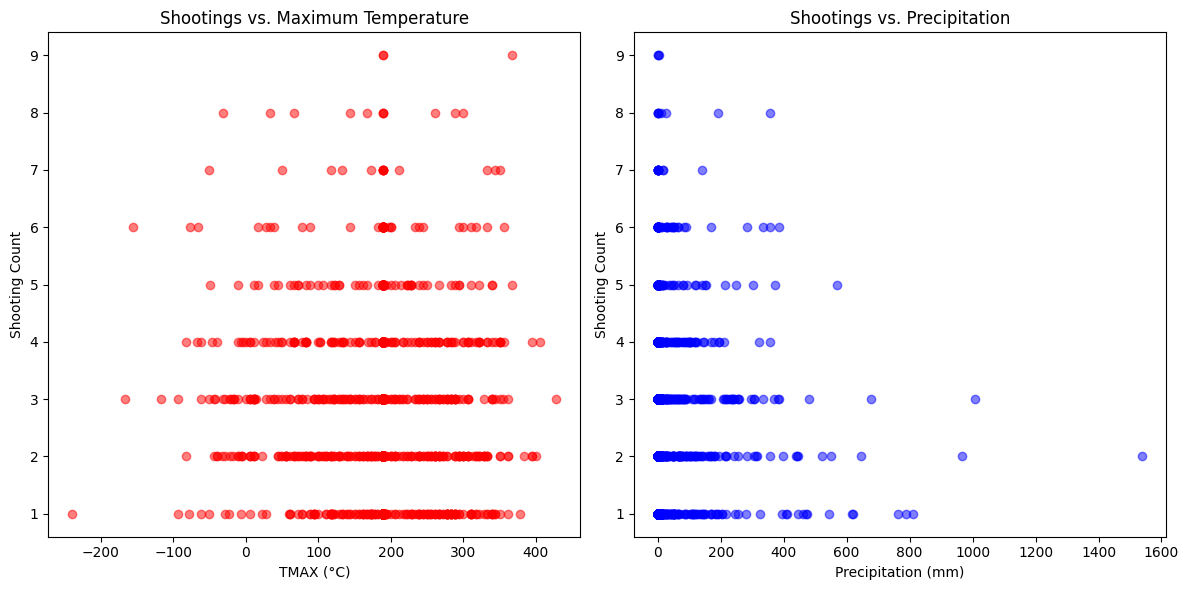

In [49]:
plt.figure(figsize=(12, 6))

# Shootings vs. Temperature
plt.subplot(1, 2, 1)
plt.scatter(daily_data['TMAX'], daily_data['shooting_count'], alpha=0.5, color='red')
plt.title('Shootings vs. Maximum Temperature')
plt.xlabel('TMAX (°C)')
plt.ylabel('Shooting Count')

# Shootings vs. Precipitation
plt.subplot(1, 2, 2)
plt.scatter(daily_data['PRCP'], daily_data['shooting_count'], alpha=0.5, color='blue')
plt.title('Shootings vs. Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Shooting Count')

plt.tight_layout()
plt.show()

C:\Users\bose\AppData\Local\Temp\ipykernel_11752\2797233994.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = daily_data.groupby('Temperature_Category')['shooting_count'].mean()


Temperature_Category
Cold        2.983871
Moderate    3.176471
Hot         2.718039
Name: shooting_count, dtype: float64


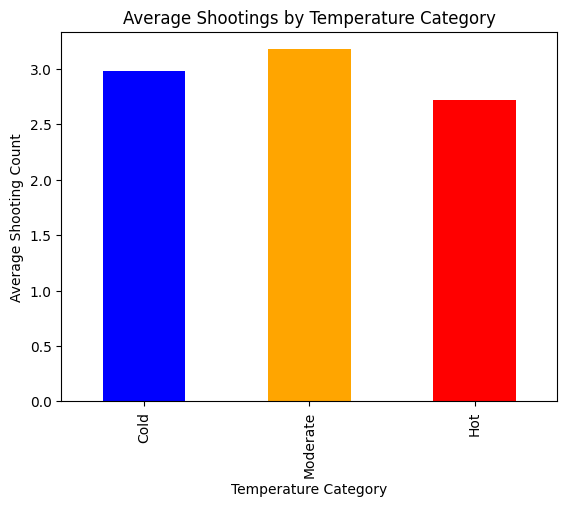

In [50]:
# Categorize temperature into bins
daily_data['Temperature_Category'] = pd.cut(daily_data['TMAX'], bins=[-np.inf, 10, 25, np.inf], labels=['Cold', 'Moderate', 'Hot'])

# Average shootings by temperature category
category_counts = daily_data.groupby('Temperature_Category')['shooting_count'].mean()
print(category_counts)

# Plot average shootings by category
category_counts.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title('Average Shootings by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Average Shooting Count')
plt.show()

In [51]:
print(shootings.columns)

Index(['date', 'index', 'id', 'name', 'manner_of_death', 'armed', 'age',
       'gender', 'race', 'city', 'state', 'signs_of_mental_illness',
       'threat_level', 'flee', 'body_camera', 'arms_category', 'year', 'month',
       'day_of_week', 'count'],
      dtype='object')


In [52]:
print(sorted_weather.columns)

Index(['ID', 'DATE', 'TMAX', 'TMIN', 'EVAP', 'PRCP', 'Latitude', 'Longitude',
       'Elevation', 'year', 'month'],
      dtype='object')


In [53]:
# Use merge_asof to map weather location to the closest shooting date
shootings_with_location = pd.merge_asof(
    shootings, 
    sorted_weather[['DATE', 'Latitude', 'Longitude']], 
    left_on='date', 
    right_on='DATE', 
    direction='nearest'
)

# Drop unnecessary columns
shootings_with_location.drop(columns=['DATE'], inplace=True)

In [ ]:
# Initialize map
m = folium.Map(location=[37.7749, -122.4194], zoom_start=5)

# Add shooting incidents to the map
for _, row in shootings_with_location.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Save the map
m.save("shooting_hotspots_with_weather.html")

# Display the map
IFrame("shooting_hotspots_with_weather.html", width=700, height=500)